# Em qual horário mais notas são criadas?

## Import das bibliotecas utilizadas

In [19]:
import pandas as pd
import getpass
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Conexão com o banco mysql

In [4]:
password = getpass.getpass()

database = 'notes_app'
user = 'root'
host='localhost'

con = pymysql.connect(host=host, user=user, passwd=password, database=database)
cur = con.cursor()
con.autocommit(True)

 ·······


## Leitura dos dados

In [5]:
nota = pd.read_sql("select * from nota ", con)
disciplina = pd.read_sql("select * from disciplina", con)

In [6]:
nota.head()

,id_nota,titulo,texto,ultima_modificacao,data_criacao,numero_edicoes,disciplina
0,1,Matemática,"A matemática (dos termos gregos μάθημα, transl...",2020-07-24 16:44:49,2021-06-16 08:46:10,13,1
1,2,Equação linear,Diz-se em matemática que uma equação polinomia...,2019-02-05 03:07:41,2020-03-13 08:14:38,10,1
2,3,Equação algébrica,"Em matemática, equações algébricas são equaçõe...",2021-02-05 11:27:51,2021-08-13 04:38:18,6,1
3,4,Equação diferencial,"Em matemática, uma equação diferencial é uma e...",2020-08-24 06:47:59,2021-04-16 20:57:31,21,1
4,5,Vetor (matemática),"Em geometria analítica, um vetor é uma classe ...",2020-12-13 14:35:00,2021-05-01 15:50:43,20,1


In [7]:
disciplina.head()

,id_disciplina,nome,periodo
0,1,Algebra Linear,1
1,2,Biologia,7
2,3,Geografia,8
3,4,Língua Inglesa,1
4,5,Filosofia,4


## Agrupando os dados por hora

In [8]:
hour_series = nota['data_criacao'].dt.hour
hour_count = hour_series.value_counts(sort=False).sort_index()
hour_count

0     13
1      5
2     12
3      8
4     12
5      3
6     10
7      8
8     12
9      9
10    11
11    10
12    10
13     5
14     5
15    13
16     8
17     5
18     3
19     9
20     9
21    13
22     8
23     8
Name: data_criacao, dtype: int64

## Visualizando os dados

<AxesSubplot:>

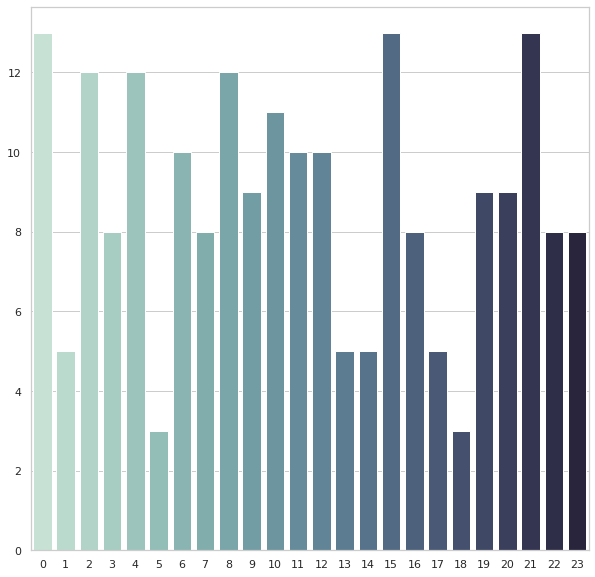

In [9]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=hour_count.index, y=hour_count.values, palette="ch:start=.2,rot=-.4", ax=ax)

Ou seja, podemos observar alguns picos de criação de notas nos intervalos entre 0 e 1 hora, 15 e 16 horas e 21 e 22 horas. Assim, poderiamos concluir que o acesso ao banco de dados nesses horários atingiria um pico, podendo então tomar medidas adequadas, apesar de esse não ser o dado mais aproriedado para tal.<br />
Esses dados me trouxeram a curiosidade de analisar essas contagens para os dias da semana, o que será feito no próximo tópico, como um extra.

## Em qual dia da semana mais notas são criadas?

Já fizemos a leitura de dados, então, podemos pular essa etapa.

## Agrupando os dados por dia da semana

In [25]:
hour_series = nota['data_criacao']
day_series = hour_series.apply(lambda data: calendar.day_name[data.weekday()])
day_count = day_series.value_counts(sort=False).sort_index()
print(day_count)

Friday       38
Monday       34
Saturday     23
Sunday       25
Thursday     31
Tuesday      25
Wednesday    33
Name: data_criacao, dtype: int64


## Visualizando os dados

<AxesSubplot:>

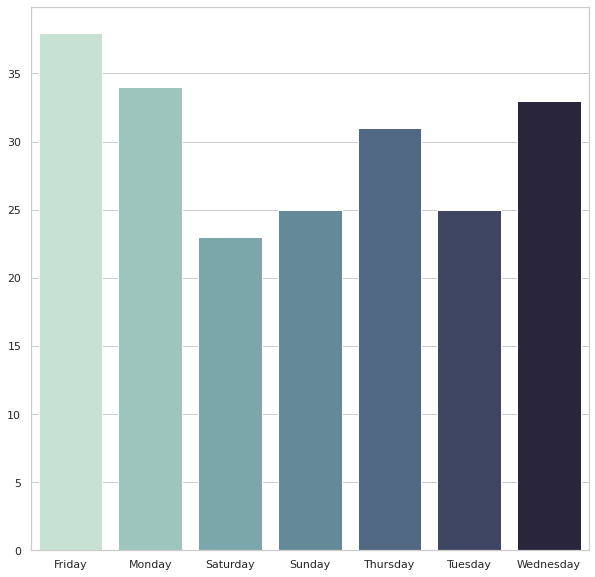

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=day_count.index, y=day_count.values, palette="ch:start=.2,rot=-.4", ax=ax)

Ou seja, podemos ver que sexta é o dia da semana em que mais notas são criadas.